#install Dependencies

In [ ]:
!pip install catboost

In [ ]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc



train_url = "https://drive.google.com/uc?export=download&id=1ONmjxVLbAvMoas5Rqai9pZ0TbWCrsDOC"
test_url = "https://drive.google.com/uc?export=download&id=1WbUpvudclwmaBzJwPwtE4kDw6uw5t7aq"

train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

In [ ]:
train.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


# Exploratory Data Analysis

In [ ]:
print(train.shape)
print(train.describe())
print(train.isnull().sum())

(29165, 20)
                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000  

In [ ]:
for i in train.columns:
  print('here is the',i)
  print(train[i].value_counts())

here is the ID
5037048    1
5024541    1
5112625    1
5089643    1
5091778    1
          ..
5035794    1
5022836    1
5143310    1
5142489    1
5062632    1
Name: ID, Length: 29165, dtype: int64
here is the Gender
F    19549
M     9616
Name: Gender, dtype: int64
here is the Has a car
N    18128
Y    11037
Name: Has a car, dtype: int64
here is the Has a property
Y    19557
N     9608
Name: Has a property, dtype: int64
here is the Children count
0     20143
1      6003
2      2624
3       323
4        52
5        15
7         2
14        2
19        1
Name: Children count, dtype: int64
here is the Income
135000.0    3468
180000.0    2487
157500.0    2469
225000.0    2373
112500.0    2359
            ... 
164250.0       1
42300.0        1
432000.0       1
145350.0       1
82350.0        1
Name: Income, Length: 259, dtype: int64
here is the Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student     

In [ ]:
train.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [ ]:
train.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [ ]:
for i in train.columns:
  print('this is', i)
  print(train[i].unique())

this is ID
[5037048 5044630 5079079 ... 5047710 5009886 5062632]
this is Gender
['M' 'F']
this is Has a car
['Y' 'N']
this is Has a property
['Y' 'N']
this is Children count
[ 0  1  2  3  4  5  7 14 19]
this is Income
[ 135000.   180000.   360000.   270000.   202500.    90000.   306000.
  315000.   157500.   148500.   130500.    45000.   225000.   391500.
  112500.    99000.   207000.   189000.   292500.    81000.   126000.
  234000.   108000.   405000.   166500.   128542.5  540000.   450000.
  121500.   216000.    67500.   211500.   103500.   247500.   265500.
  153000.    72000.   337500.    85500.   238500.   120150.   171000.
  144000.   139500.   117000.   198000.   132372.   310500.   634500.
   76500.   240750.   261000.   193500.  1350000.   229500.   215550.
   94500.   720000.   206100.    78750.    58500.   427500.   382500.
  900000.   328500.    54000.   252000.    49500.   297000.   176175.
  175500.   560250.    73350.    65250.    40500.   495000.   360450.
  274500.   

(array([1.7904e+04, 9.1580e+03, 1.6980e+03, 2.2300e+02, 1.2000e+02,
        4.4000e+01, 3.0000e+00, 3.0000e+00, 5.0000e+00, 7.0000e+00]),
 array([  27000.,  181800.,  336600.,  491400.,  646200.,  801000.,
         955800., 1110600., 1265400., 1420200., 1575000.]),
 <BarContainer object of 10 artists>)

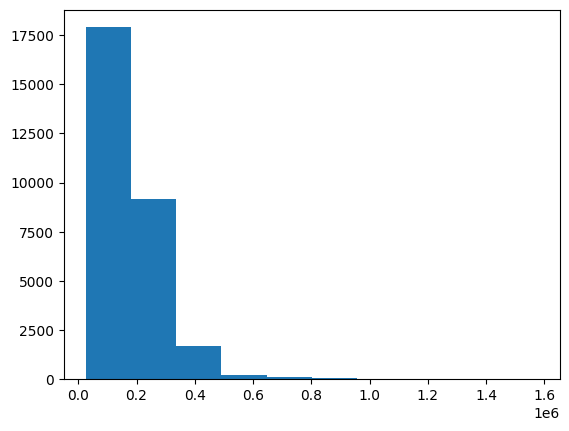

In [ ]:
plt.hist(train['Income'])

In [ ]:
train['Age']

0       -16271
1       -10130
2       -12821
3       -20929
4       -16207
         ...  
29160   -23400
29161   -15532
29162   -17782
29163   -21635
29164   -18858
Name: Age, Length: 29165, dtype: int64

In [ ]:
test

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7287,5115415,F,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-21724,-1351,1,0,0,0,NaN,2.0,-22.0,0
7288,5068826,F,Y,Y,0,157500.0,Working,Higher education,Married,House / apartment,-14976,-3550,1,0,0,1,Drivers,2.0,-42.0,0
7289,5026088,F,N,Y,0,67500.0,Working,Secondary / secondary special,Widow,House / apartment,-20482,-5030,1,1,1,0,NaN,1.0,-25.0,0
7290,5142701,F,Y,N,0,95850.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18931,-6678,1,1,0,0,Laborers,2.0,-49.0,0


In [ ]:
heated_cols = train[['Gender','Has a car','Has a property','Children count','Education level','Employment status','Marital status','Dwelling','Has a work phone','Has a phone','Has an email','Job title','Family member count']]
heated_list = ['Gender','Has a car','Has a property','Children count','Education level','Employment status','Marital status','Dwelling','Has a work phone','Has a phone','Has an email','Job title','Family member count']

<Axes: xlabel='Has a work phone', ylabel='count'>

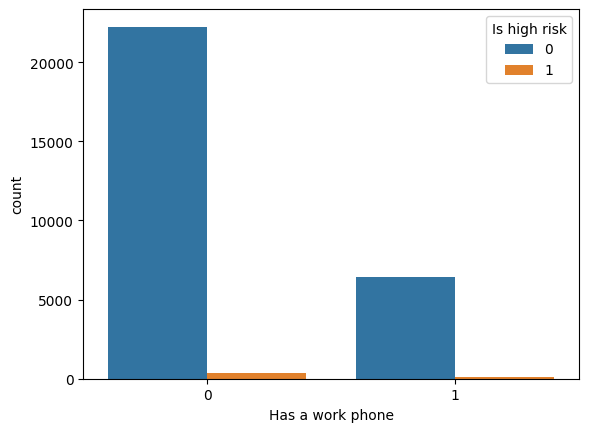

In [ ]:
sns.countplot(x=train['Has a work phone'], hue=train['Is high risk'])

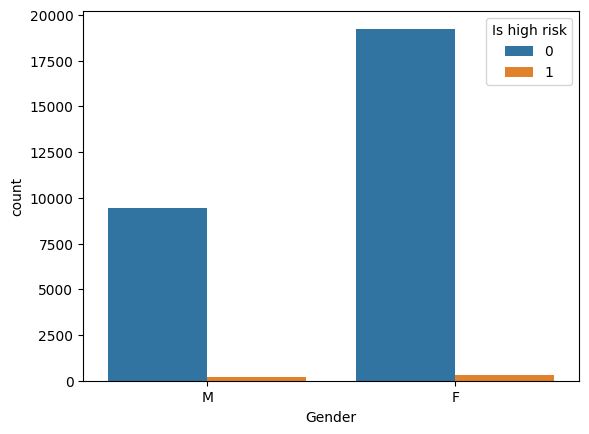

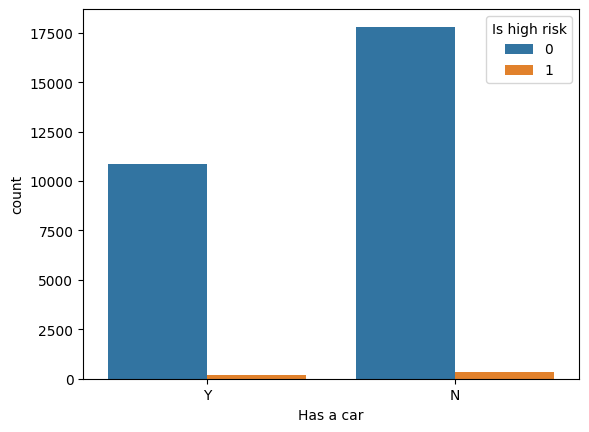

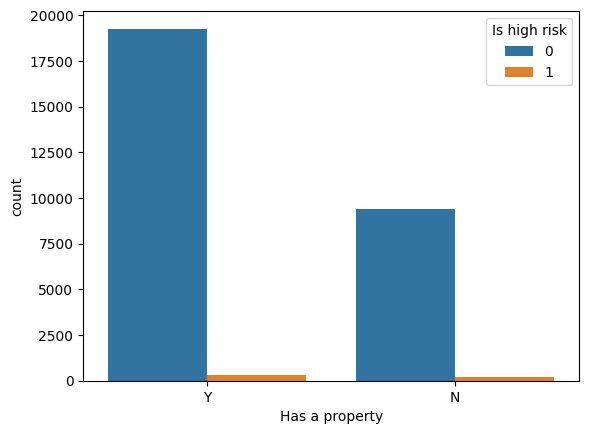

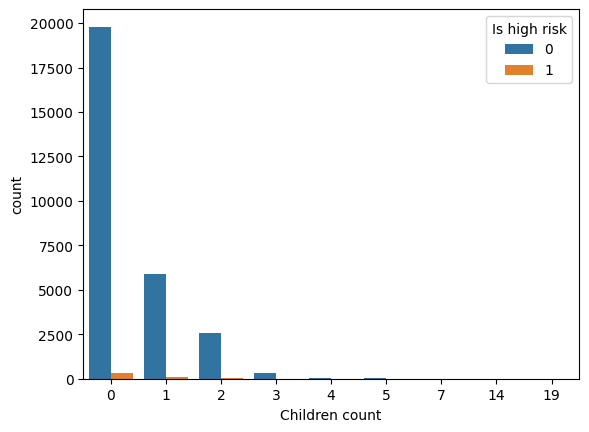

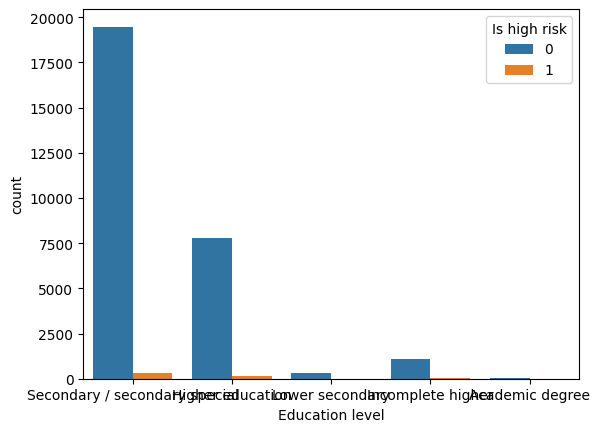

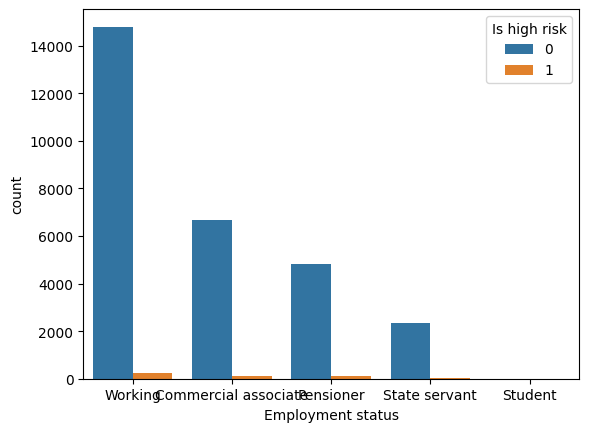

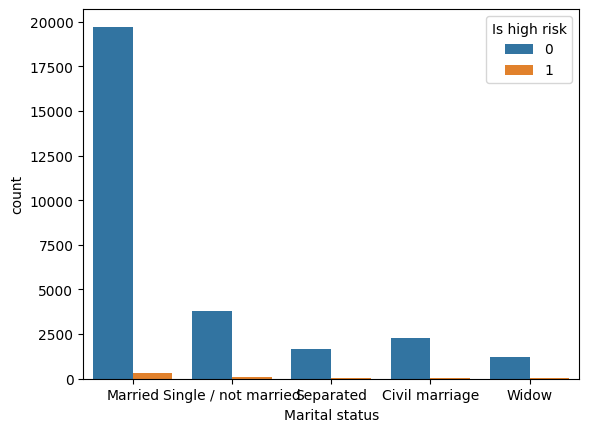

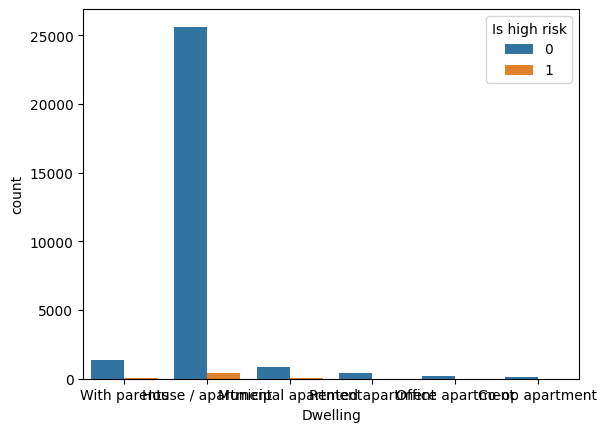

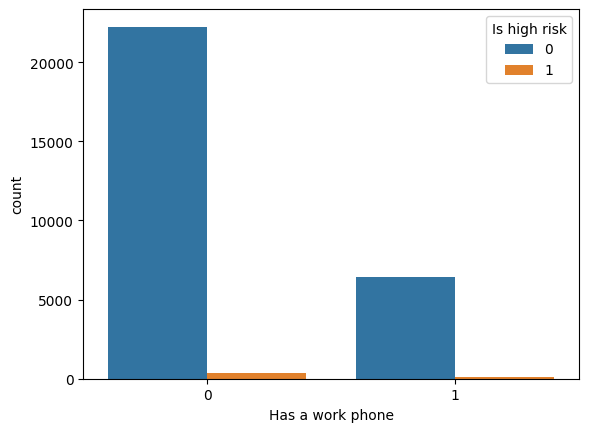

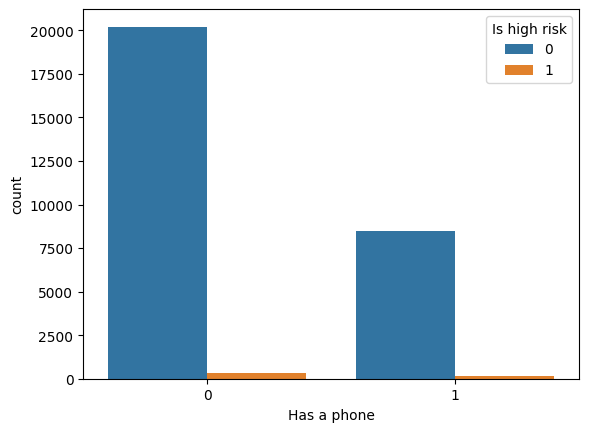

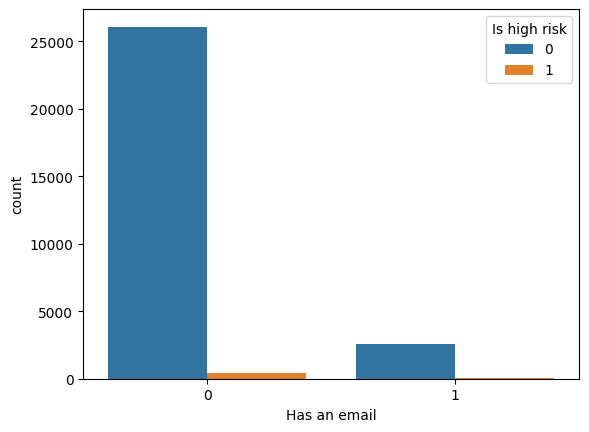

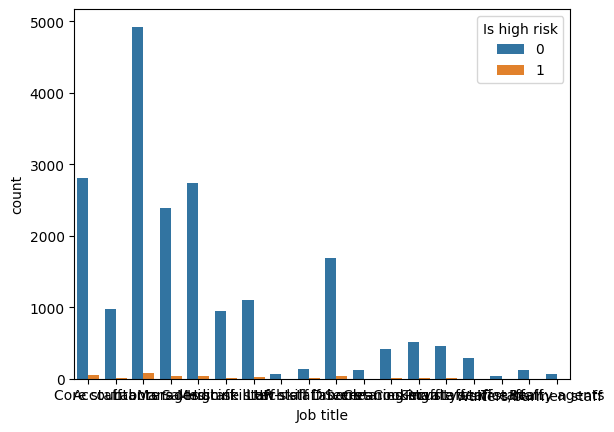

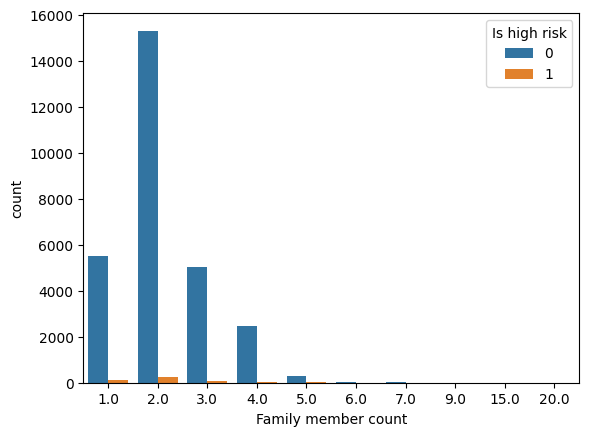

In [ ]:
for col in heated_list:
  sns.countplot(x=train[col], hue=train['Is high risk'])
  plt.show()

In [ ]:
train[train['Age'] >= 0]
#so age is kinda not good here

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk


In [ ]:
train['Employment status'].value_counts()

Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: Employment status, dtype: int64

In [ ]:
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


In [ ]:
train['ID'].value_counts(ascending =True)

5037048    1
5091778    1
5085636    1
5025156    1
5146530    1
          ..
5142489    1
5022663    1
5023171    1
5096664    1
5062632    1
Name: ID, Length: 29165, dtype: int64

# Feature Engineering

In [ ]:
for df in (train,test):
  df.drop(columns=['Has a mobile phone','Age','Employment length','Account age','ID'],axis=1,inplace=True)

In [ ]:
income_bins = [0., 50000., 100000., 150000., 200000., 250000., 300000., 350000., 400000., 450000., 500000., float('inf')]
income_labels = ['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k',
                 '350k-400k', '400k-450k', '450k-500k', '500k+']
for df in (train, test):
    df['Income'] = pd.to_numeric(df['Income'], errors='coerce')
    df['Income'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, right=False)

In [ ]:
train

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Has a work phone,Has a phone,Has an email,Job title,Family member count,Is high risk
0,M,Y,Y,0,100k-150k,Working,Secondary / secondary special,Married,With parents,0,0,0,Core staff,2.0,0
1,F,Y,N,1,100k-150k,Commercial associate,Higher education,Single / not married,House / apartment,0,0,0,Accountants,2.0,0
2,F,N,Y,2,150k-200k,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Laborers,4.0,0
3,F,Y,Y,0,350k-400k,Commercial associate,Higher education,Single / not married,House / apartment,0,0,1,Managers,1.0,0
4,F,N,N,0,250k-300k,Working,Secondary / secondary special,Separated,House / apartment,0,1,0,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,F,N,Y,0,100k-150k,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0,1,1,NaN,1.0,0
29161,F,N,Y,1,100k-150k,Commercial associate,Secondary / secondary special,Married,House / apartment,0,0,0,Core staff,3.0,0
29162,F,N,Y,0,50k-100k,Working,Secondary / secondary special,Married,House / apartment,1,1,0,Managers,2.0,0
29163,F,N,Y,0,150k-200k,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0,1,0,NaN,2.0,0


In [ ]:
le = LabelEncoder()
for df in (train,test):
  for col in df.columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
train['Income'].unique()

array([ 1,  2,  6,  4,  3, 10,  5,  0,  7,  9,  8])

# Baseline model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
dt = DecisionTreeClassifier ()
x = train.drop(columns=['Is high risk'])
y = train['Is high risk']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =  0.2)
dt.fit(x_train,y_train)
predication = dt.predict(x_test)
score = accuracy_score(predication,y_test)
score2 = f1_score(predication,y_test)
print(score)
print(score2)

0.9773701354363107
0.18518518518518515


# Data Generation Techniques

In [ ]:
x = train.drop(columns=['Is high risk'])
y = train['Is high risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x, y)

x = x_train_resampled
y = y_train_resampled
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
dt = DecisionTreeClassifier()
dt.fit(x_train_resampled, y_train_resampled)

predictions = dt.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
#there is probably some degree of overfitting

Accuracy: 0.9456701840062789
F1 Score: 0.9469651825998128


Feature Importance:
Gender: 0.03782977988128925
Has a car: 0.045791109614787356
Has a property: 0.05180326816652618
Children count: 0.060582534909190265
Income: 0.16950352687094591
Employment status: 0.09458962144690908
Education level: 0.05526917543453621
Marital status: 0.07657811475036208
Dwelling: 0.043207829612778866
Has a work phone: 0.04307197136174969
Has a phone: 0.04964504873092396
Has an email: 0.02379661312918951
Job title: 0.19557794243393017
Family member count: 0.05275346365688149


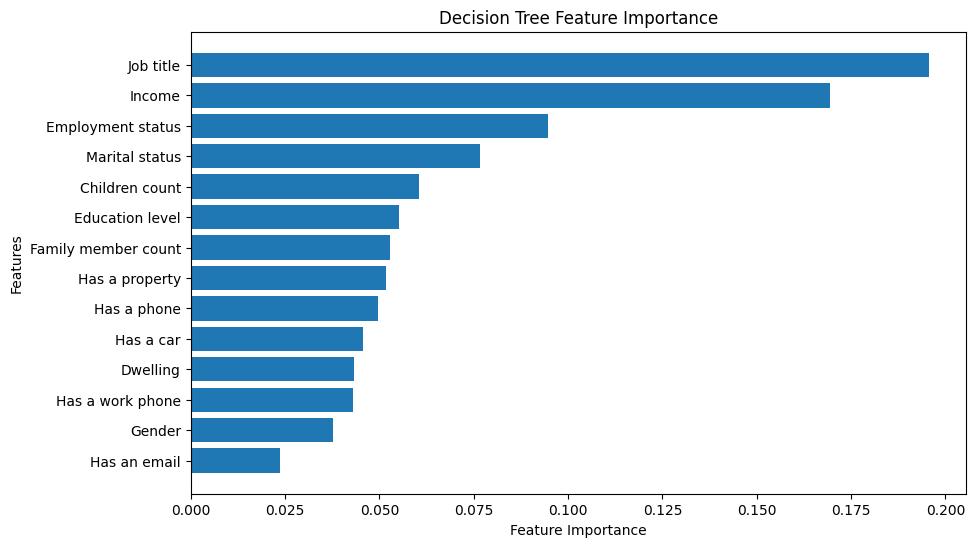

In [ ]:
feature_importance = dt.feature_importances_
print("Feature Importance:")
for i, feature in enumerate(x.columns):
    print(f"{feature}: {feature_importance[i]}")

feature_importance = dt.feature_importances_
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [x.columns[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

In [ ]:
lgbm_model = lgb.LGBMClassifier()


cv_scores_accuracy = cross_val_score(lgbm_model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_scores_f1 = cross_val_score(lgbm_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-Validation Accuracy:", cv_scores_accuracy.mean())
print("Cross-Validation F1 Score:", cv_scores_f1.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22933, number of negative: 22932
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 78
[LightGBM] [Info] Number of data points in the train set: 45865, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500011 -> initscore=0.000044
[LightGBM] [Info] Start training from score 0.000044
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 22932, number of negative: 22933
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_w

In [ ]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

catboost_model = CatBoostClassifier()
cv_scores_accuracy_catboost = cross_val_score(catboost_model, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
cv_scores_f1_catboost = cross_val_score(catboost_model, x_train_resampled, y_train_resampled, cv=5, scoring='f1')

print("Cross-Validation Accuracy (CatBoost):", cv_scores_accuracy_catboost.mean())
print("Cross-Validation F1 Score (CatBoost):", cv_scores_f1_catboost.mean())

Streaming output truncated to the last 5000 lines.
6:	learn: 0.6222404	total: 70.3ms	remaining: 9.97s
7:	learn: 0.6156134	total: 78.2ms	remaining: 9.7s
8:	learn: 0.6100529	total: 85.7ms	remaining: 9.44s
9:	learn: 0.6035287	total: 93.3ms	remaining: 9.24s
10:	learn: 0.5974162	total: 101ms	remaining: 9.07s
11:	learn: 0.5925476	total: 109ms	remaining: 8.95s
12:	learn: 0.5879588	total: 116ms	remaining: 8.82s
13:	learn: 0.5838548	total: 123ms	remaining: 8.69s
14:	learn: 0.5789280	total: 131ms	remaining: 8.62s
15:	learn: 0.5742503	total: 139ms	remaining: 8.53s
16:	learn: 0.5709139	total: 146ms	remaining: 8.44s
17:	learn: 0.5669683	total: 156ms	remaining: 8.49s
18:	learn: 0.5619949	total: 164ms	remaining: 8.46s
19:	learn: 0.5590466	total: 171ms	remaining: 8.39s
20:	learn: 0.5550933	total: 179ms	remaining: 8.32s
21:	learn: 0.5520229	total: 186ms	remaining: 8.27s
22:	learn: 0.5480012	total: 193ms	remaining: 8.21s
23:	learn: 0.5454156	total: 201ms	remaining: 8.17s
24:	learn: 0.5431107	total: 208m

In [ ]:
catboost_model.fit(x_train_resampled,y_train_resampled)
pred =catboost_model.predict(x_test)
f1_thing = f1_score(pred,y_test)
accuracy = accuracy_score(pred,y_test)
print('The accuracy score = ', accuracy)
print('The F1 score = ', f1_thing)

Learning rate set to 0.058046
0:	learn: 0.6789854	total: 9.57ms	remaining: 9.56s
1:	learn: 0.6654403	total: 18.4ms	remaining: 9.17s
2:	learn: 0.6537479	total: 26.9ms	remaining: 8.95s
3:	learn: 0.6441328	total: 35.6ms	remaining: 8.87s
4:	learn: 0.6341275	total: 45.2ms	remaining: 8.99s
5:	learn: 0.6258924	total: 54.3ms	remaining: 8.99s
6:	learn: 0.6174704	total: 63.1ms	remaining: 8.95s
7:	learn: 0.6113342	total: 71.7ms	remaining: 8.89s
8:	learn: 0.6057396	total: 80.1ms	remaining: 8.82s
9:	learn: 0.5993092	total: 92.6ms	remaining: 9.17s
10:	learn: 0.5934138	total: 101ms	remaining: 9.13s
11:	learn: 0.5892199	total: 111ms	remaining: 9.11s
12:	learn: 0.5847295	total: 120ms	remaining: 9.1s
13:	learn: 0.5798669	total: 129ms	remaining: 9.07s
14:	learn: 0.5749274	total: 138ms	remaining: 9.07s
15:	learn: 0.5711616	total: 147ms	remaining: 9.04s
16:	learn: 0.5679417	total: 156ms	remaining: 9.01s
17:	learn: 0.5631711	total: 165ms	remaining: 9.01s
18:	learn: 0.5579124	total: 174ms	remaining: 8.99s
19

#Model Evaluation

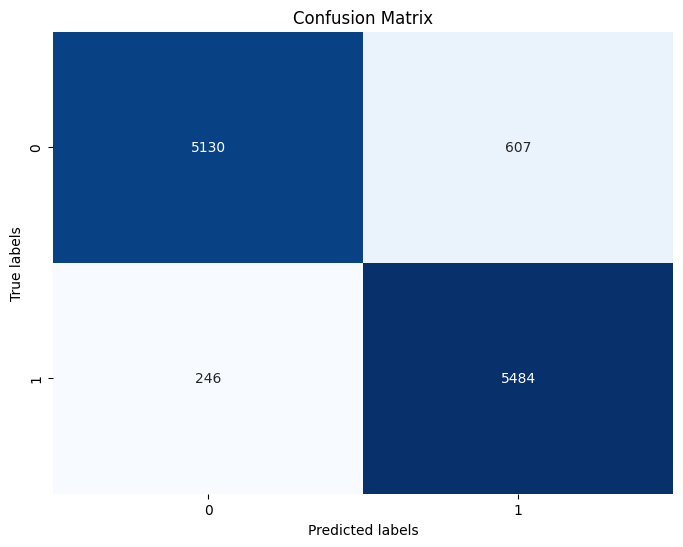

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
print('The accuracy score = ', accuracy)
print('The F1 score = ', f1_thing)

The accuracy score =  0.9256126275398971
The F1 score =  0.927840284239912


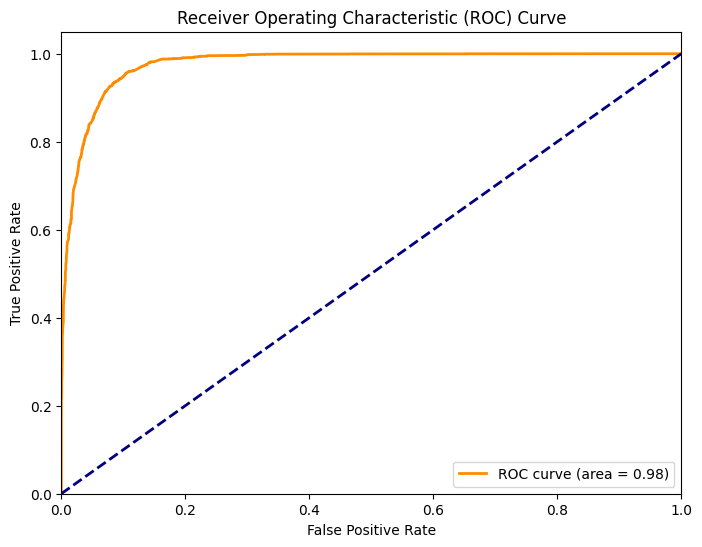

In [ ]:
y_scores = catboost_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
for col in test.columns:
  test[col] = test[col].astype(str)

In [ ]:
# Convert predicted labels to integers
pred_int = [int(label) for label in pred]
testy = [int(label) for label in testy]

# Calculate evaluation metrics
f1_score_catboost = f1_score(testy, pred_int)
accuracy_catboost = accuracy_score(testy, pred_int)

# Print the evaluation metrics
print('The accuracy score = ', accuracy_catboost)
print('The F1 score = ', f1_score_catboost)

The accuracy score =  0.8865880416895228
The F1 score =  0.09814612868047982
